<a href="https://colab.research.google.com/github/pauhidalgoo/TDR-MusicNN/blob/main/TDR_Pau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TDR-Pau**


---



*Primera versió*

Pau Hidalgo Pujol

Aquest és un codi fruit del meu [TDR](https://drive.google.com/file/d/1ZhvwYO2UMx40ZbBRD95WKq1T5hDV4oAG/view?usp=sharing), que se centra en la creació d'una xarxa neuronal per a la composició de música, que és el programa que es troba a continuació. Aquesta és una de les 5 versions creades. Els resultats es poden veure a la següent [carpeta](https://drive.google.com/drive/folders/1cWPsp867zJSv5gCvFJqYUapwJOYXpv7J?usp=sharing).

Per executar els  codis, cal clicar el botó que tenen a l'esquerra entre [ ]. 

In [ ]:
#@title Llibreria MIDO
#@markdown Aquest codi instal·la la llibreria MIDO. La resta de llibreries que utilitzarem ja venen per defecte en el Colab.

!pip install mido

     |████████████████████████████████| 51 kB 4.6 MB/s 


In [ ]:
#@title Accedeix als arxius de Drive
#@markdown Munta els arxius de Drive de forma que puguin ser accedits pel codi. Et demana un codi d'autorització, que obtens clicant al link i iniciant sessió amb el teu compte de Google.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En el següents enllaços ([enllaç 1](https://drive.google.com/drive/folders/1IlUM-jFv26QOl7ZjsoB-ShZEu7a576H8?usp=sharing), [enllaç 2](https://drive.google.com/drive/folders/19OQ_CvwHfhBYbkxCCwhW6VuM2SMabQPL?usp=sharing)) hi han les carpetes que contenen els fitxers d'entrenament. Addicionalment, també hi ha la [carpeta 3](https://drive.google.com/drive/folders/1BADFQoKME8XMoBseY1Zt6i4D32pCmsb4?usp=sharing) que conté MIDI de grups i compositors famosos. Per poder executar el codi correctament, s'ha de buscar el seu directori dins del drive (a la icona de la carpeta de la esquerra es veuen tots els fitxers i si fas click dret sobre un dells ja t'apareix la opció de copiar el directori) i copiar-lo en la variable *cancogeneral* del codi. 

## Coses a tenir en compte a la hora d'executar el codi:
- No es recomana agafar menys de 100 notes d'entrada, ja que a vegades pot donar error.
- Recordar canviar el directori si està en un altre lloc del vostre Drive
- No posar un nombre excessiu de notes, neurones i repeticions, ja que tardarà molta estona a completar-se.
- Si surt un error que diu alguna cosa similar a : Is a directory: Songs/Training/.ipynb_chekcpoints, executar el codi que posa *Elimina possible error*.
- Si el fitxer no s'ha baixat bé, executar el penúltim codi


Número de notes: 300
Número de neurones: 10000
Learning rate: 0.0000000001
Número de repeticions: 10000


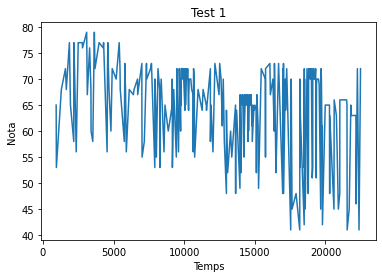

[58 67 77 72 56 77 77 76 79 67 76 68 60 58 79 72 77 76 77 56 72 77 76 68
 60 72 70 77 72 68 58 73 70 68 56 68 67 68 70 67 73 64 55 58 73 70 72 73
 53 70 64 55 72 68 53 65 70 56 65 60 65 70 53 68 55 72 70 65 56 70 72 60
 70 65 72 72 70 72 70 64 70 72 65 70 72 70 72 64 67 68 70 70 68 67 56 72
 70 55 68 64 68 65 64 72 58 61 65 56 73 67 73 70 67 61 70 58 48 64 60 52
 60 55 65 48 60 64 49 67 65 52 60 67 65 65 55 67 60 67 65 65 67 67 58 65
 60 65 67 65 67 61 64 65 58 65 64 65 52 67 61 49 72 70 55 72 73 67 70 60
 64 73 52 55 73 48 72 60 73 48 70 64 72 41 69 63 70 45 48 41 70 53 69 63
 42 72 53 70 61 45 70 72 48 53 70 72 72 70 72 70 51 53 70 72 72 70 70 72
 54 51 69 70 70 69 45 72 70 54 61 42 65 65 48 63 45 66 63 45 48 66 66 66
 65 41 45 65 63 63 61 46 72 41 72]
New set of weights found, iteration: 0 loss: 4.876234618254577 acc: 0.00398406374501992
New set of weights found, iteration: 100 loss: 4.8762346121502524 acc: 0.00398406374501992
New set of weights found, iteration: 200 loss: 4.8762346

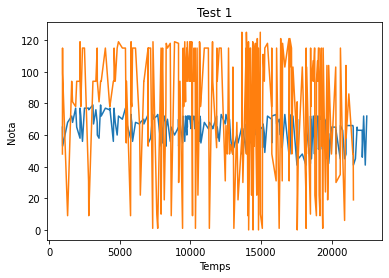

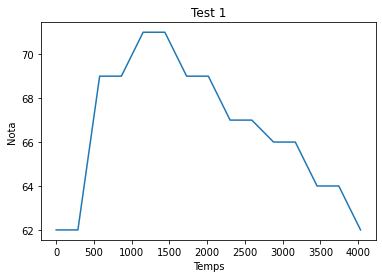

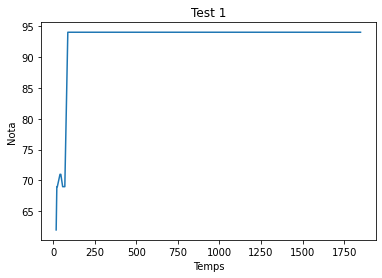

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title Codi { form-width: "50px" }
# @markdown Aquest és el codi del treball en si. Al executar-lo et demanarà una sèrie de paràmetres, com el número de notes d'entrada o el número de neurones. A la part inferior es pot anar observant la sortida de pantalla, que ens mostra dades sobre l'entrenament de la xarxa. Per veure el codi, cal simplent clicar on posa Show Code.

from __future__ import division
from google.colab import files
from random import random
import random
from random import seed
import numpy
import math
import mido
import sys
import os
import matplotlib.pyplot as plt
from mido import Message, MidiFile, MidiTrack, MAX_PITCHWHEEL, MetaMessage, UnknownMetaMessage

#paràmetres generals de la xarxa, els escull l'usuari
#cancogeneral = (input('Directori de la cançó: '))
cancogeneral = "/content/drive/MyDrive/TDR/Songs/Songs/Training2"
#inputsgeneral = int(input('Número de inputs: '))
inputsgeneral = 8
notesgeneral = int(input('Número de notes: '))
neuronesgeneral = int(input('Número de neurones: '))
learningrategeneral = float(input('Learning rate: '))
repsgeneral = int(input('Número de repeticions: '))
#sortidageneral = int(input('Número de notes de sortida: '))
sortidageneral = 180

class capa: #classe de les capes de la xarxa
	def __init__(self, n_inputs, n_neurons): #incialitza uns pesos i biases aleatoris
		self.weights = 0.10 * numpy.random.randn(n_inputs, n_neurons)
		self.biases = 0.005 * numpy.random.randn(1, n_neurons)
	def forward(self, inputs): #multiplica els inputs pels pesos i els hi suma els biases
		self.output = numpy.dot(inputs, self.weights) + self.biases

class ReLu: #funció d'activació
	def forward(self, inputs):
		self.output = numpy.maximum(0, inputs)

class sig: #funció d'activacó alternativa
	def forward(self, inputs):
		self.output = 1.0 / (1.0 + numpy.exp(-inputs))

class Softmax: #activació de la última capa
	def forward(self, inputs):
		exp_values= numpy.exp(inputs - numpy.max(inputs, axis=1, keepdims=True))
		probabilities = exp_values / numpy.sum(exp_values, axis=1, keepdims=True)
		self.output = probabilities

class Loss: #calcula l'error
    def calculate(self, output, y):

        sample_losses = self.forward(output, y)

        data_loss = numpy.mean(sample_losses)

        return data_loss

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):

        # Llargada de les prediccions
        samples = len(y_pred)

        # evita que pugui existir el log(0)
        y_pred_clipped = numpy.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]


        # Losses
        negative_log_likelihoods = -numpy.log(correct_confidences)
        return negative_log_likelihoods
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
 
def arraytomidi(fitxer): #funció encarregada de transformar els arrays a MIDI
    notes = fitxer
    outfile = MidiFile()
    track = MidiTrack()
    lll = 0
    outfile.tracks.append(track)
    wa = 0
    #print(len(notes))
    ar = notes[0]
    outfile.type = int(ar[0])
    #print (int(ar[0]))
    ar = notes[1]
    outfile.ticks_per_beat = int(ar[0])
    #print(int(ar[0]))
    ar = notes[2]
    outfile.charset = (ar[0])
    #print(outfile.charset)
    ar = notes[3]
    notes=notes[3]
    #print(notes)
    ritmes = [240, 240, 240, 480, 480, 960, 1920, 240, 480, 480, 480, 960]
    for i in range(len(notes)-1): #itera per tots els elements de l'array
        i = i+1
        ar=[]
        ar.append(notes[i])
        track.append(Message('program_change', channel=0, program=1, time = 0))
        track.append(MetaMessage(type="set_tempo", tempo=90000, time= 0))
        if (ar != []):
            if (isinstance(ar[0], int)==True):
                if (ar[0] == 1 and len(ar)==4):
                    track.append(Message('note_on', note=ar[2], velocity=ar[3], time=ar[4]))
                elif (ar[0] == 0 and len(ar)==4):
                    track.append(Message('note_off', note=ar[2], velocity=ar[3], time=ar[4]))
                elif (ar[0] == 1 and len(ar)==5):
                    track.append(Message('note_on', channel = ar[1], note=ar[2], velocity=ar[3], time=ar[4]))
                    lll = lll+1
                elif (ar[0] == 0 and len(ar)==5):
                    track.append(Message('note_off', channel = ar[1], note=ar[2], velocity=ar[3], time=ar[4]))
                    lll = lll+1
                elif (len(ar)==3 and ar[0]==0):
                    track.append(Message('note_off', channel = 0, note=ar[1], velocity=64, time=ar[2]))
                elif (len(ar)==3 and ar[0]==1):
                    track.append(Message('note_on', channel = 0, note=ar[1], velocity=64, time=ar[2]))
                elif(len(ar)==1):
                    track.append(Message('note_on', channel = 0, note=int(ar[0]), velocity=(random.randint(20,50)), time=random.randint(1,20)))
                    track.append(Message('note_off', channel = 0, note=int(ar[0]), velocity=(random.randint(20,40)), time=ritmes[random.randint(0,1)])) #si la nota no té ritme, li assigna un aletori
            #comrova tots els possibles missatges
            elif (len(ar)!=1):
                e = ar[0]
                if (ar[2] == 'end_of_track'):
                    l2 = ar[3].split("=")
                    e2 = l2[1].replace('>', '')
                    track.append(MetaMessage(type='end_of_track', time=int(e2)))
                    if (i+1<len(notes)):
                        ar2 = notes[i+1]
                        ee = ar2[0]
                        if (ee[2]!='track_name'):
                            if (outfile.type != 0):
                                track = MidiTrack()
                                track.append(MetaMessage(type='track_name', name=("track"+str(wa)), time=int(e2)))
                                outfile.tracks.append(track)
                            else:
                                track.append(MetaMessage(type='track_name', name=("track" + str(wa)), time=int(e2)))
                            wa = wa + 1
 
 
                elif (ar[2] == 'track_name'):
                    l2 = ar[3].split("=")
                    l3 = ar[(len(ar)-1)].split("=")
                    e2 = l3[1].replace('>', '')
                    if (outfile.type != 0):
                        track = MidiTrack()
                        a = str(l2[1])
                        track.append(MetaMessage(type='track_name', name=a, time=int(e2)))
                        outfile.tracks.append(track)
                    else:
                        a = str(l2[1])
                        track.append(MetaMessage(type='track_name', name=a, time=int(e2)))
                elif (ar[2] == 'time_signature'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    l4 = ar[5].split("=")
                    l5 = ar[6].split("=")
                    l6 = ar[7].split("=")
                    e2 = l6[1].replace('>', '')
                    track.append(MetaMessage(type="time_signature", numerator=int(l2[1]), denominator=int(l3[1]),
                                             clocks_per_click=int(l4[1]), notated_32nd_notes_per_beat=int(l5[1]),
                                             time=int(e2)))
                elif (ar[2] == 'key_signature'):
                    l2 = ar[3].split("=")
                    e1 = l2[1]
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="key_signature", key=e1[1], time=int(e2)))
                elif (ar[2] == 'set_tempo'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="set_tempo", tempo=int(l2[1]), time=int(e2)))
                elif (ar[2] == 'instrument_name'):
                    l2 = ar[3].split("=")
                    l3 = ar[len(e)-1].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="instrument_name", name = l2[1], time = int(e2)))
                elif (e=='program_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    e2 = l4[1].replace('>', '')
                    track.append(Message('program_change', channel=int(l2[1]), program=int(l3[1]), time = int(l4[1])))
                elif (e=='control_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    l5 = ar[4].split("=")
                    track.append(Message('control_change', channel=int(l2[1]), control=int(l3[1]), value = int(l4[1]), time=int(l5[1])))
                elif (e=='sysex'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    e2 = l3[1].replace('>', '')
                    e3 = l2[1].split(',')
                    e4 = []
                    for w in e3:
                        o = w.replace('(', '')
                        o = o.replace(')', '')
                        e4.append(int(o))
                    track.append(Message(type= 'sysex', data=e4, time=int(e2)))
 
                elif (ar[2]=='midi_port'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type='midi_port', port=int(l2[1]), time=int(e2)))
                elif (ar[2]=='lyrics'):
                    l2 = ar[3].split("=")
                    l3 = ar[len(ar) - 1].split("=")
                    e2 = l3[1].replace('>', '')
                    track.append(MetaMessage(type="lyrics", text=l2[1], time=int(e2)))
                elif (ar[0]=='control_change'):
                    l2 = ar[1].split("=")
                    l3 = ar[2].split("=")
                    l4 = ar[3].split("=")
                    l5 = ar[4].split("=")
                    track.append(Message(type='sysex', channel=int(l2), control=int(l3) , value=int(l4) , time=int(l5)))
                elif (ar[2]=='smpte_offset'):
                    l2 = ar[3].split("=")
                    l3 = ar[4].split("=")
                    l4 = ar[5].split("=")
                    l5 = ar[6].split("=")
                    l6 = ar[7].split("=")
                    l7 = ar[8].split("=")
                    l8 = ar[9].split("=")
                    e2 = l8[1].replace('>', '')
                    track.append((MetaMessage(type='smpte_offset', frame_rate=int(l2[1]), hours=int(l3[1]), minutes=int(l4[1]), seconds=int(l5[1]), frames=int(l6[1]), sub_frames=int(l7[1]), time=int(e2))))
                else:
                    res = "res"
                    #print("CIGUEÑA")
                    #print(ar)
 
    outfile.save('/content/drive/MyDrive/TDR/Songs/Songs/provau.mid')
 
 
def miditoarray(midi): #transforma els fitxers MIDI a Arrays
    if __name__ == '__main__':
        w = 0
        mat = []
        arr = []
        midi_file = MidiFile(midi)
        arr.append(midi_file.type)
        mat.append(arr)
        arr = []
        arr.append(midi_file.ticks_per_beat)
        mat.append(arr)
        arr = []

        arr.append(midi_file.charset)
        mat.append(arr)
        arr = []
        # print(midi_file.ticks_per_beat)
        # print(midi_file.type)
        i = 0
        for i, track in enumerate(midi_file.tracks):
            if (i == 2):
                break
            i = i + 1
            # print("tratratra")

            for message in track: #itera per tots els missatges dels fitxers MIDI

                e = (format(message).split())
                if (e[0] == 'program_change'):
                    arr.append(e)
                elif (e[0] == '<meta'):
                    arr.append(e)

                elif (e[0] == 'pitchwheel'):
                    l1 = (e[1].split('='))
                    l2 = (e[2].split('='))
                    l3 = (e[3].split('='))
                    arr.append(int(l1[1]))
                    arr.append(int(l2[1]))
                    arr.append(int(l3[1]))
                elif (e[0] == 'note_on' or e[0] == 'note_off'):

                    if (e[0] == "note_on"):
                        arr.append(1)
                    else:
                        arr.append(0)
                    l1 = (e[1].split('='))
                    l2 = (e[2].split('='))
                    l3 = (e[3].split('='))
                    l4 = (e[4].split('='))
                    arr.append(int(l1[1]))
                    arr.append(int(l2[1]))
                    arr.append(int(l3[1]))
                    arr.append(int(l4[1]))
                elif (e[0] == 'control_change'):
                    arr.append(e)
                elif (e[0] == 'sysex'):
                    arr.append(e)
                if (arr != []):
                  mat.append(arr)

                arr = []

                w = w + 1
    else:
        res = "res"
        # print("aveurequepasa")
    
    return mat
 
def graficador(s): #funció encarregada de fer les gràfiques
    nota = []
    temps = []
    melo = []
    oo = []
    onota = []
    otemps = []
    matriu = []
    meta = []
    i = 0
    e=0
    oe=0
    for c in s: #itera per tots els elements de l'array
        if (len(c)!=0 and len(c)!=1 and len(c)==5):
            oo.append(c[0])
            if (c[0]==1):
                nota.append(c[2]) #afegeix les notes en una llista
                if(temps!=[]):
                    temps.append(c[4]+temps[e]) #afegeix els temps de les notes en una altra llista
                    e = e + 1
                else:
                    temps.append(c[4] + 0)
 
            elif (c[0]==1 and c[4]!=0):
                w = 0
                while (w<c[4]):
                    melo.append(c[2])
                    w = w + 1
            elif (c[0]==0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)
 
        elif (len(c)!=0 and isinstance(c[0], int)==False and c[0]!="latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)
 
    plt.plot(temps, nota) #crea la gràfica basant-se en la llista de notes i de temps
    plt.title('Test 1')
    plt.xlabel('Temps')
    plt.ylabel('Nota')
    plt.show()
    plt.savefig('V1-generacio.png')
    return (nota)

def grafcomparacio(s1, s2): #crea dues gràfiques en una mateixa imatge per facilitar-ne la comparació
    nota1 = []
    temps1 = []
    melo1 = []
    nota2 = []
    temps2 = []
    melo2 = []
    oo = []
    onota = []
    otemps = []
    matriu = []
    meta = []
    i = 0
    e=0
    oe=0
    for c in s1: #itera per tots els elements del primer array, fent el mateix que la funció graficador
        if (len(c)!=0 and len(c)!=1 and len(c)==5):
            oo.append(c[0])
            if (c[0]==1):
                nota1.append(c[2])
                if(temps1!=[]):
                    temps1.append(c[4]+temps1[e])
                    e = e + 1
                else:
                    temps1.append(c[4] + 0)
 
            elif (c[0]==1 and c[4]!=0):
                w = 0
                while (w<c[4]):
                    melo1.append(c[2])
                    w = w + 1
            elif (c[0]==0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)
 
        elif (len(c)!=0 and isinstance(c[0], int)==False and c[0]!="latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)
    i = 0
    e=0
    oe=0       
    for c in s2: #itera per tots els elements del segon, i guarda les notes i els temps en unes altres llistes
        if (len(c)!=0 and len(c)!=1 and len(c)==5):
            oo.append(c[0])
            if (c[0]==1):
                nota2.append(c[2])
                if(temps2!=[]):
                    temps2.append(c[4]+temps2[e])
                    e = e + 1
                else:
                    temps2.append(c[4] + 0)
 
            elif (c[0]==1 and c[4]!=0):
                w = 0
                while (w<c[4]):
                    melo2.append(c[2])
                    w = w + 1
            elif (c[0]==0):
                onota.append(c[2])
                if (otemps != []):
                    otemps.append(c[4] + otemps[oe])
                    oe = oe + 1
                else:
                    otemps.append(c[4] + 0)
 
        elif (len(c)!=0 and isinstance(c[0], int)==False and c[0]!="latin1"):
            oo.append(2)
            a = c[0]
            meta.append(a)

    plt.plot(temps1, nota1, label = "Original") #crea la gràfica del primer array
    plt.plot(temps1[:len(nota2)], nota2, label = "Predicció") #crea la gràfica del segon array en la mateixa imatge
    plt.title('Test 1') 
    plt.xlabel('Temps')
    plt.ylabel('Nota')
    plt.show()
    plt.savefig('V1-entrenament.png')


def dades(array): #prepara les dades perquè puguin ser utilitzades en la xarxa
    i = 0
    matriu = []
    pred = []
    while (i<(len(array)-inputsgeneral)): #agrupa les notes en grups de llargada inputsgeneral
        nou = []
        l = 0
        while (l<inputsgeneral):
            nou.append(array[l+i])
            l = l + 1
        matriu.append(nou)
        pred.append(array[i+inputsgeneral]) #la següent nota s'afegirà a la variable Y
        i = i + 1
    return matriu, pred
 
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
ar = []
for l in os.listdir(cancogeneral):
    l = cancogeneral + "/" + l
    arr = miditoarray(l)
    ar = ar + arr

X, y = dades(graficador(ar[:notesgeneral]))
X = numpy.array(X[:notesgeneral])
y = numpy.array(y[:notesgeneral])
X = (X-63.5)/63.5
print(y)
# Create model
dense1 = capa(inputsgeneral, neuronesgeneral)  # first dense layer
activation1 = ReLu()
dense2 = capa(neuronesgeneral, 127)  # second dense layer
activation2 = Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(repsgeneral):

    # Update weights with some small random values
    dense1.weights += learningrategeneral * numpy.random.randn(inputsgeneral, neuronesgeneral)
    dense1.biases += learningrategeneral * numpy.random.randn(1, neuronesgeneral)
    dense2.weights += learningrategeneral * numpy.random.randn(neuronesgeneral, 127)
    dense2.biases += learningrategeneral * numpy.random.randn(1, 127)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)


    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = numpy.argmax(activation2.output, axis=1)
    accuracy = numpy.mean(predictions==y)

    if (loss<lowest_loss):
        if (iteration%100 == 0):
          print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

print('Lowest loss:', lowest_loss)
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

array = [[0],[96],['latin1']]
eee = numpy.argmax(activation2.output, axis=1).tolist()
array.append(eee)
arraytomidi(array)
e = miditoarray("/content/drive/MyDrive/TDR/Songs/Songs/provau.mid")
grafcomparacio(ar[:notesgeneral], e)



ar = miditoarray('/content/drive/MyDrive/TDR/Songs/Songs/inici.mid')
X, y = dades(graficador(ar[:notesgeneral + 1]))
X = numpy.array(X[:notesgeneral])
y = numpy.array(y[:notesgeneral])
X = (X-63.5)/63.5
if (len(X)>1):
  X = X[0]
k = 0
kl = []
array2 = [[0],[96],['latin1']]
for c in X:
  c = (c*63.5)+63.5
  kl.append(int(c))
while (k<sortidageneral):
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)
  k = k + 1
  eee2 = numpy.argmax(activation2.output, axis = 1).tolist()
  eee2 = eee2[0]
  kl.append(eee2)
  X = X.tolist()
  X.append((eee2-63.5)/63.5)
  X.pop(0)
  X = numpy.array(X)


for i in kl:
  i = (i*63.5)+63.5
  i = int(i)
array2.append(kl)

arraytomidi(array2[:sortidageneral])
graficador(miditoarray("/content/drive/MyDrive/TDR/Songs/Songs/provau.mid"))
files.download( "/content/drive/MyDrive/TDR/Songs/Songs/provau.mid" ) 


In [ ]:
#@title Exporta la cançó generada
from google.colab import files
files.download( "/content/drive/MyDrive/TDR/Songs/Songs/provau.mid" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Elimina possible error
rmdir /content/drive/MyDrive/TDR/Songs/Songs/Training/.ipynb_checkpoints
#Si el vostre directori d'entrenment es diferent, canvieu-lo aquí també

## **Part No-TDR**
Aquesta part del codi no és ni tan sols mencionada en el tdr. L'he creat bàsicament per facilitar escoltar els fitxers MIDI. Bàsicament, és un conversor MIDI - .wav.

In [ ]:
#@title Conversor MIDI - wav
#@markdown Instal·la les llibreries necessàries i converteix el fitxer MIDI en un fitxer wav.
!apt install fluidsynth &> /dev/null
!cp /content/drive/MyDrive/TDR/Songs/Songs/Kawai Grand Piano.sf2 ./font.sf2 &> /dev/null
!fluidsynth -ni /usr/share/sounds/sf2/FluidR3_GM.sf2 /content/drive/MyDrive/TDR/Songs/Songs/provau.mid -F /content/drive/MyDrive/TDR/Songs/Songs/wavprovau.wav -r 44100 &> /dev/null
print("Fet! 🥳")



Fet! 🥳


In [ ]:
#@title Exporta la cançó generada en format àudio
from google.colab import files
files.download( "/content/drive/MyDrive/TDR/Songs/Songs/wavprovau.wav" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Escolta la melodia
#@markdown Permet reproduïr el fitxer wav directament des d'aquí.
#@markdown  
#@markdown <font color="red">⚠ No sempre funciona (a vegades es desconecta el Colab)
from IPython.display import Audio
Audio('/content/drive/MyDrive/TDR/Songs/Songs/wavprovau.wav') 